In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/least-developed-countries/Least_Developed_Countries.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Import csv file

In [3]:
data = pd.read_csv('/kaggle/input/least-developed-countries/Least_Developed_Countries.csv')
data.head()

,Name,Region,GENC,Year,Population,Annual Growth Rate %,Rate of Natural Increase,Population Density (People per Sq. Km.),Total Fertility Rate,Crude Birth Rate,"Life Expectancy at Birth, Both Sexes","Infant Mortality Rate, Both Sexes",Crude Death Rate,Net Migration Rate
0,Least Developed Countries,Least Developed Countries,NaN,2024,"1,153,095,771",--,2.31,56.7,3.81,29.8,--,45.6,6.7,--
1,Afghanistan,"Least Developed Countries,Afghanistan",AF,2024,"40,121,552",2.22,2.23,61.5,4.43,34.2,54.4,101.3,11.8,-0.1
2,Angola,"Least Developed Countries,Angola",AO,2024,"37,202,061",3.33,3.35,29.8,5.70,41.1,62.9,55.6,7.6,-0.2
3,Bangladesh,"Least Developed Countries,Bangladesh",BD,2024,"168,697,184",0.89,1.18,"1,296.00",2.07,17.3,75.2,28.8,5.5,-2.9
4,Benin,"Least Developed Countries,Benin",BJ,2024,"14,697,052",3.29,3.26,132.9,5.34,40.3,63,52.9,7.6,0.2


In [4]:
data.head(6)

,Name,Region,GENC,Year,Population,Annual Growth Rate %,Rate of Natural Increase,Population Density (People per Sq. Km.),Total Fertility Rate,Crude Birth Rate,"Life Expectancy at Birth, Both Sexes","Infant Mortality Rate, Both Sexes",Crude Death Rate,Net Migration Rate
0,Least Developed Countries,Least Developed Countries,NaN,2024,"1,153,095,771",--,2.31,56.7,3.81,29.8,--,45.6,6.7,--
1,Afghanistan,"Least Developed Countries,Afghanistan",AF,2024,"40,121,552",2.22,2.23,61.5,4.43,34.2,54.4,101.3,11.8,-0.1
2,Angola,"Least Developed Countries,Angola",AO,2024,"37,202,061",3.33,3.35,29.8,5.70,41.1,62.9,55.6,7.6,-0.2
3,Bangladesh,"Least Developed Countries,Bangladesh",BD,2024,"168,697,184",0.89,1.18,"1,296.00",2.07,17.3,75.2,28.8,5.5,-2.9
4,Benin,"Least Developed Countries,Benin",BJ,2024,"14,697,052",3.29,3.26,132.9,5.34,40.3,63,52.9,7.6,0.2
5,Bhutan,"Least Developed Countries,Bhutan",BT,2024,"884,546",0.95,0.95,23,1.76,15.3,73.7,24.3,5.9,0


In [5]:
data.shape

(47, 14)

**2. Delete the Region Column**

In [6]:
data.drop(['Region'], axis= 1, inplace= True) 

In [7]:
data

,Name,GENC,Year,Population,Annual Growth Rate %,Rate of Natural Increase,Population Density (People per Sq. Km.),Total Fertility Rate,Crude Birth Rate,"Life Expectancy at Birth, Both Sexes","Infant Mortality Rate, Both Sexes",Crude Death Rate,Net Migration Rate
0,Least Developed Countries,NaN,2024,"1,153,095,771",--,2.31,56.7,3.81,29.8,--,45.6,6.7,--
1,Afghanistan,AF,2024,"40,121,552",2.22,2.23,61.5,4.43,34.2,54.4,101.3,11.8,-0.1
2,Angola,AO,2024,"37,202,061",3.33,3.35,29.8,5.70,41.1,62.9,55.6,7.6,-0.2
3,Bangladesh,BD,2024,"168,697,184",0.89,1.18,"1,296.00",2.07,17.3,75.2,28.8,5.5,-2.9
4,Benin,BJ,2024,"14,697,052",3.29,3.26,132.9,5.34,40.3,63,52.9,7.6,0.2
5,Bhutan,BT,2024,"884,546",0.95,0.95,23,1.76,15.3,73.7,24.3,5.9,0
6,Burkina Faso,BF,2024,"23,042,199",2.4,2.46,84.2,4.02,31.9,64.2,47.0,7.3,-0.6
7,Burma,MM,2024,"57,527,139",0.71,0.85,88,1.97,15.7,70.3,32.1,7.3,-1.4
8,Burundi,BI,2024,"13,590,102",2.81,2.89,529.2,4.90,34.6,68.1,35.7,5.7,-0.7
9,Cambodia,KH,2024,"17,063,669",0.99,1.26,96.7,2.17,18.2,71.4,27.9,5.7,-2.6


**3. Group the data by a country with the highest population rate in discending order**


In [8]:
data = data[data['Name']!= 'Least Developed Countries'] # Remove Least Developed Countries row

In [9]:
data.loc[:,'Population'] = data['Population'].astype(str).str.replace(',', '')
data.loc[:,'Population'] = pd.to_numeric(data['Population'], errors='coerce')
sorted_data = data.sort_values(by='Population', ascending= False)
sorted_data

,Name,GENC,Year,Population,Annual Growth Rate %,Rate of Natural Increase,Population Density (People per Sq. Km.),Total Fertility Rate,Crude Birth Rate,"Life Expectancy at Birth, Both Sexes","Infant Mortality Rate, Both Sexes",Crude Death Rate,Net Migration Rate
3,Bangladesh,BD,2024,168697184,0.89,1.18,"1,296.00",2.07,17.3,75.2,28.8,5.5,-2.9
16,Ethiopia,ET,2024,118550298,2.37,2.38,108.1,3.84,29.6,67.7,32.6,5.8,-0.1
13,Congo (Kinshasa),CD,2024,115403027,3.11,3.17,50.9,5.49,39.2,62.6,57.4,7.6,-0.6
40,Tanzania,TZ,2024,67462121,2.72,2.76,76.2,4.27,32.5,70.8,29.6,5.0,-0.4
7,Burma,MM,2024,57527139,0.71,0.85,88,1.97,15.7,70.3,32.1,7.3,-1.4
39,Sudan,SD,2024,50467278,2.55,2.71,27.1,4.47,33.1,67.8,40.6,6.1,-1.6
44,Uganda,UG,2024,49283041,3.18,3.49,250,5.17,39.6,69.7,28.5,4.7,-3.1
1,Afghanistan,AF,2024,40121552,2.22,2.23,61.5,4.43,34.2,54.4,101.3,11.8,-0.1
2,Angola,AO,2024,37202061,3.33,3.35,29.8,5.70,41.1,62.9,55.6,7.6,-0.2
29,Mozambique,MZ,2024,33350954,2.54,2.69,42.4,4.66,36.5,58.3,58.2,9.6,-1.5


**4. Plot Each Country's Population**

<function matplotlib.pyplot.show(close=None, block=None)>

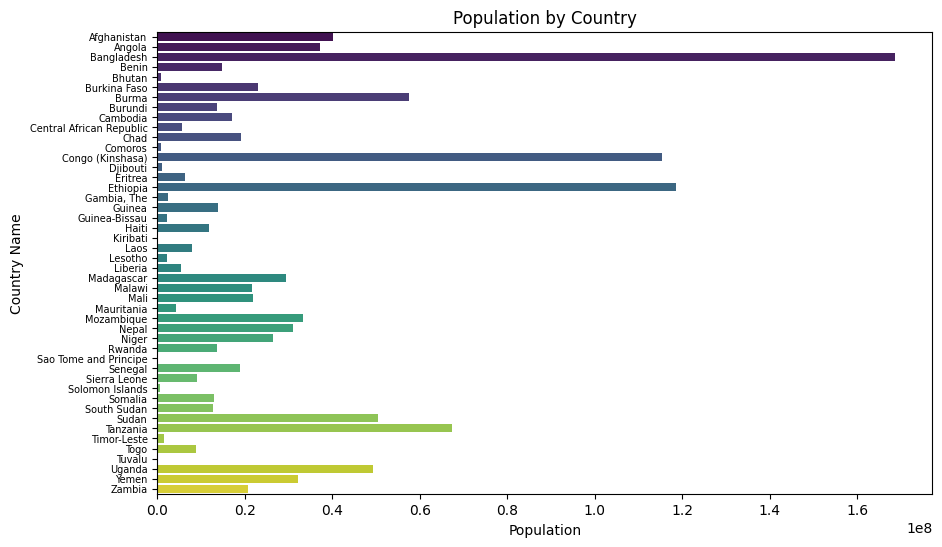

In [10]:
plt.figure(figsize=(10,6))

sns.barplot(x='Population', y = 'Name', data=data, palette='viridis', orient='h' )

plt.title('Population by Country')
plt.xlabel('Population')
plt.ylabel('Country Name')

plt.tick_params(axis='y', labelsize = 7)

plt.tight_layout
plt.show

**5. Plot Each Country's Annual Growth Rate**

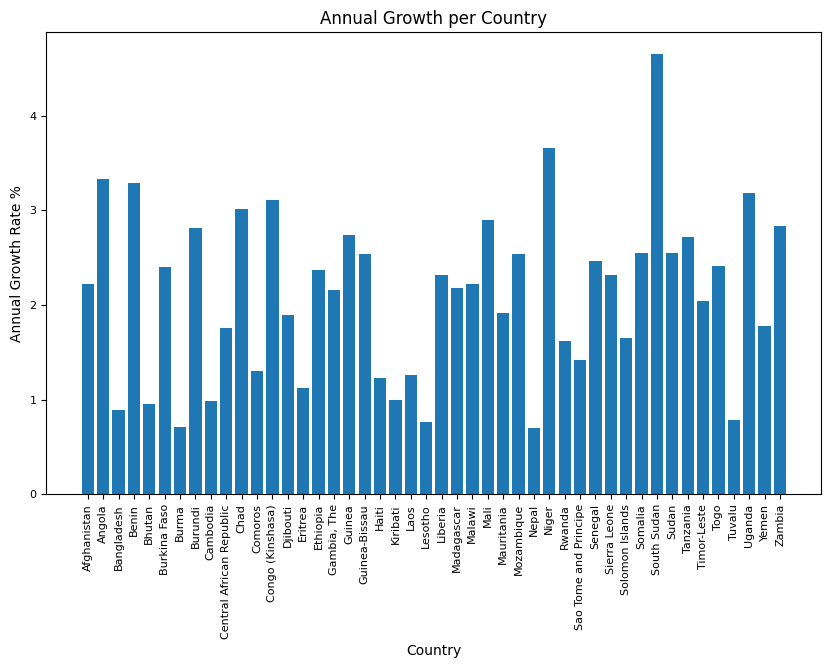

In [11]:
data.loc[:,'Annual Growth Rate %'] = pd.to_numeric(data['Annual Growth Rate %'], errors='coerce')
plt.figure(figsize=(10,6))

plt.bar(data['Name'], data['Annual Growth Rate %'])
plt.xlabel('Country')
plt.ylabel('Annual Growth Rate %')
plt.title("Annual Growth per Country")
plt.tick_params(axis='y', labelsize = 8)
plt.tick_params(axis='x', labelsize = 8, rotation = 90)
plt.show()

***6. Display countries who's Annual Growth Rate % is bewteen 1 and 2.5 and Life Expectancy at Birth, Both Sexes between 60 and 69 ***

In [12]:
data.loc[:,'Life Expectancy at Birth, Both Sexes'] = pd.to_numeric(data['Life Expectancy at Birth, Both Sexes'], errors='coerce')
result = data.loc[(data['Annual Growth Rate %']>=1)\
                   & (data['Annual Growth Rate %']<=2.5)\
                    & (data["Life Expectancy at Birth, Both Sexes"]>=50)\
                        & (data['Life Expectancy at Birth, Both Sexes']<=69),\
                            ['Name', 'Annual Growth Rate %', 'Life Expectancy at Birth, Both Sexes']]
result

,Name,Annual Growth Rate %,"Life Expectancy at Birth, Both Sexes"
1,Afghanistan,2.22,54.4
6,Burkina Faso,2.4,64.2
10,Central African Republic,1.76,56.4
12,Comoros,1.3,67.8
14,Djibouti,1.89,65.9
15,Eritrea,1.12,67.5
16,Ethiopia,2.37,67.7
17,"Gambia, The",2.16,68.4
20,Haiti,1.23,65.6
21,Kiribati,1.0,68.5


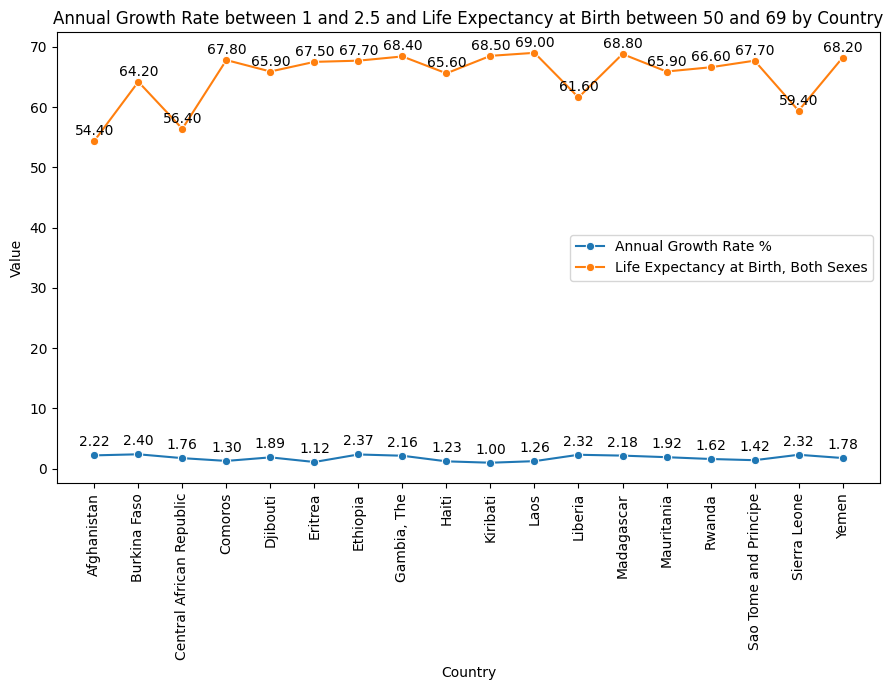

In [13]:
plt.figure(figsize=(9,7))

sns.lineplot(x='Name', y = 'Annual Growth Rate %', data=result, label = 'Annual Growth Rate %', marker = 'o' )
sns.lineplot(x='Name', y = 'Life Expectancy at Birth, Both Sexes', data=result, label = 'Life Expectancy at Birth, Both Sexes', marker = 'o' )
            
for i, txt in enumerate(result['Annual Growth Rate %']):
    plt.annotate(f'{txt:.2f}', (result['Name'].iloc[i], result['Annual Growth Rate %'].iloc[i]+1), ha = 'center', va = 'bottom')

for i, txt in enumerate(result['Life Expectancy at Birth, Both Sexes']):
    plt.annotate(f'{txt:.2f}', (result['Name'].iloc[i], result['Life Expectancy at Birth, Both Sexes'].iloc[i] + 0.5), ha='center', va='bottom')

plt.title('Annual Growth Rate between 1 and 2.5 and Life Expectancy at Birth between 50 and 69 by Country')
plt.xlabel('Country')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()


**7. Lets take a look at population density for each country**

In [14]:
data_dens = data[['Name','Population Density (People per Sq. Km.)']].copy()
data_dens['Population Density (People per Sq. Km.)'] = pd.to_numeric(data_dens['Population Density (People per Sq. Km.)'], errors='coerce')
data_dens

,Name,Population Density (People per Sq. Km.)
1,Afghanistan,61.5
2,Angola,29.8
3,Bangladesh,NaN
4,Benin,132.9
5,Bhutan,23.0
6,Burkina Faso,84.2
7,Burma,88.0
8,Burundi,529.2
9,Cambodia,96.7
10,Central African Republic,9.1


In [15]:

data_dens = data_dens.dropna()

fig = px.scatter(data_dens,
                 x='Name',
                 y='Population Density (People per Sq. Km.)',
                 title='Population Density by Country',
                 labels={'Population Density (People per Sq. Km.)': 'Population Density', 'Name':'Country'},
                 hover_name='Name',
                 size='Population Density (People per Sq. Km.)',  
                 size_max=50,
                 color='Population Density (People per Sq. Km.)',
                 color_continuous_scale = 'reds')


fig.update_layout(showlegend=False) 
fig.show()


# The End